In [5]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv("../preprocessing/preprocessed_timeseries.csv", parse_dates=True, index_col=0)
df.reset_index(inplace=True)
df.rename(columns={df.columns[0]: "ds"}, inplace=True)  # Prophet attend "ds" pour les dates

# Exclure la colonne "ds" pour identifier toutes les colonnes à prédire
target_columns = [col for col in df.columns if col != "ds"]

# Dictionnaire pour stocker les prédictions de chaque colonne
forecast_results = {}




20:49:50 - cmdstanpy - INFO - Chain [1] start processing


Training Prophet model for Revenue...


20:49:50 - cmdstanpy - INFO - Chain [1] done processing


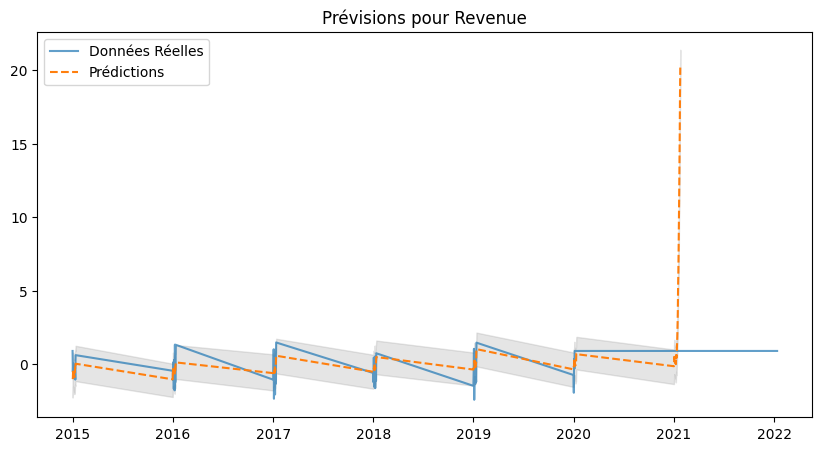

20:49:51 - cmdstanpy - INFO - Chain [1] start processing


Training Prophet model for Sales_quantity...


20:49:51 - cmdstanpy - INFO - Chain [1] done processing


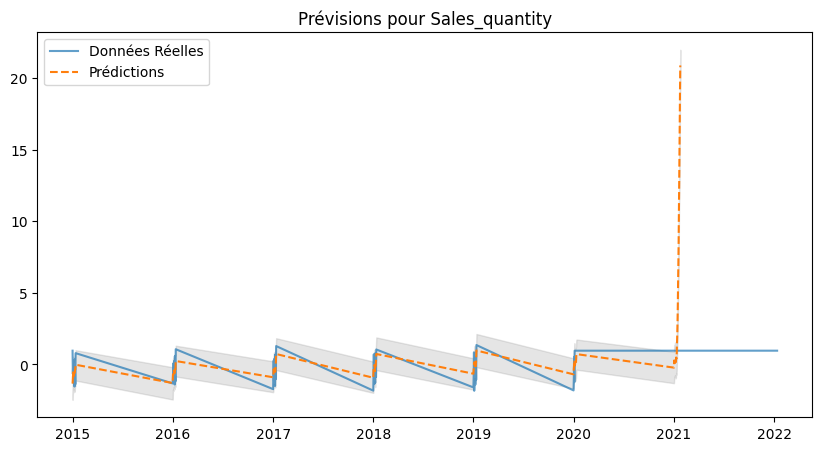

20:49:52 - cmdstanpy - INFO - Chain [1] start processing


Training Prophet model for Average_cost...


20:49:52 - cmdstanpy - INFO - Chain [1] done processing


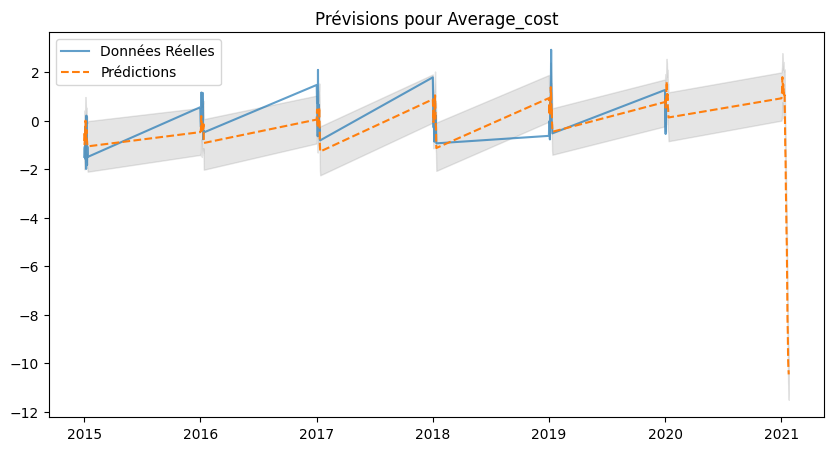

Training Prophet model for The_average_annual_payroll_of_the_region...


20:49:53 - cmdstanpy - INFO - Chain [1] start processing
20:49:53 - cmdstanpy - INFO - Chain [1] done processing


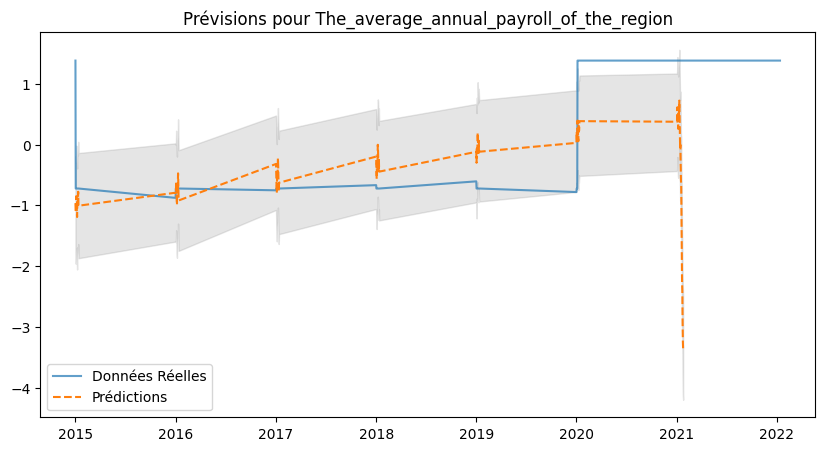

Toutes les prédictions ont été enregistrées.


In [13]:
# Boucle sur chaque colonne cible
for column in target_columns:
    print(f"Training Prophet model for {column}...")

    # Créer un DataFrame temporaire avec seulement la colonne cible et la date
    temp_df = df[["ds", column]].rename(columns={column: "y"})

    # Séparer train/test (80/20)
    split_index = int(len(temp_df) * 0.8)
    train_df = temp_df.iloc[:split_index]
    test_df = temp_df.iloc[split_index:]

    # Entraîner Prophet
    model = Prophet()
    model.fit(train_df)

    # Créer un dataframe pour les futures prédictions
    future = model.make_future_dataframe(periods=len(test_df), freq='D')

    # Faire les prédictions
    forecast = model.predict(future)

    # Sauvegarder les résultats
    forecast_results[column] = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]

    # Visualisation
    plt.figure(figsize=(10, 5))
    plt.plot(temp_df["ds"], temp_df["y"], label="Données Réelles", alpha=0.7)
    plt.plot(forecast["ds"], forecast["yhat"], label="Prédictions", linestyle="dashed")
    plt.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], color='gray', alpha=0.2)
    plt.title(f"Prévisions pour {column}")
    plt.legend()
    plt.show()

# Sauvegarder les prévisions de toutes les colonnes
for col, forecast in forecast_results.items():
    forecast.to_csv(f"forecast_{col}.csv", index=False)

print("Toutes les prédictions ont été enregistrées.")